<a href="https://colab.research.google.com/github/MokshaaAgnihotri/Mokshaa-Agnihotri/blob/main/MSIN0097-%20individual%20assignment%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
try:
    df = pd.read_csv("/content/transactions.csv", encoding='utf-8') # try default utf-8 first
except UnicodeDecodeError:
    try:
        df = pd.read_csv("/content/transactions.csv", encoding='latin-1') # try latin-1 if utf-8 fails
    except UnicodeDecodeError:
        df = pd.read_csv("/content/transactions.csv", encoding='windows-1252') # try windows-1252 if latin-1 fails

<ipython-input-1-816fc0c52bb3>:16: DtypeWarning: Columns (8,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/transactions.csv", encoding='latin-1') # try latin-1 if utf-8 fails


In [2]:
df.head()

,case_id,artfacts_id,alive_id,sales_id,lot_num,artist_name,lot_title,nationality,Year of Birth,year_of_artwork,...,est_currency,materials,height,width,depth,provenance,img_link,biography,size (inch by inch),price per inch
0,1,NaN,NaN,1380,464910,Ai Weiwei,Map of China,Chinese,1957,2004.0,...,0,1,20,79,63,NaN,"<div class=""image""><a href=""/asi/lots/464910"">...",Y,1580,102.7170886
1,2,NaN,NaN,1380,493949,Ai Weiwei,Tianammen fuck off,Chinese,1957,NaN,...,1,2,16,23,0,NaN,"<div class=""image""><a href=""/asi/lots/493949"">...",Y,368,26.17763587
2,3,NaN,NaN,1380,510067,Ai Weiwei,Coloured pots,Chinese,1957,2006.0,...,0,1,13,9,59,NaN,"<div class=""image""><a href=""/asi/lots/510067"">...",Y,117,912.5786325
3,4,NaN,NaN,1380,510068,Ai Weiwei,Untitled,Chinese,1957,1997.0,...,0,1,25,25,16,NaN,"<div class=""image""><a href=""/asi/lots/510068"">...",Y,625,82.000672
4,5,NaN,NaN,1380,3295772,Ai Weiwei,Gift from Beijing,Chinese,1957,2002.0,...,0,1,3,15,10,Provenance available in the auction catalogue.,"<div class=""image""><a href=""/asi/lots/3295772""...",Y,45,180.3255556


In [3]:
df.describe()

,case_id,artfacts_id,alive_id,sales_id,lot_num,year_of_artwork,cpi,real_price_usd,ln_real_price,event_year,est_currency,materials
count,114283.000000,0.0,0.0,114283.000000,1.142830e+05,101280.000000,112309.000000,9.156200e+04,91562.000000,114283.000000,114283.000000,114283.000000
mean,57142.000000,NaN,NaN,102918.975281,3.420143e+06,1986.961167,1.188233,8.595921e+04,9.549476,2006.794851,1.352931,6.593133
std,32990.804744,NaN,NaN,60029.472756,1.687652e+06,40.448275,0.194098,5.055038e+05,1.700922,7.517754,3.120452,5.050266
min,1.000000,NaN,NaN,115.000000,8.800000e+01,196.000000,0.197000,9.000000e+00,2.250000,1960.000000,0.000000,1.000000
25%,28571.500000,NaN,NaN,51992.000000,2.238339e+06,1979.000000,1.097000,4.336250e+03,8.370000,2004.000000,0.000000,3.000000
50%,57142.000000,NaN,NaN,103768.000000,3.788012e+06,1990.000000,1.250000,1.184600e+04,9.380000,2009.000000,1.000000,4.000000
75%,85712.500000,NaN,NaN,151266.000000,4.808799e+06,2000.000000,1.333000,3.910325e+04,10.570000,2012.000000,2.000000,8.000000
max,114283.000000,NaN,NaN,315174.000000,5.682223e+06,2015.000000,1.375000,2.740000e+07,17.130000,2015.000000,36.000000,17.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114283 entries, 0 to 114282
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   case_id              114283 non-null  int64  
 1   artfacts_id          0 non-null       float64
 2   alive_id             0 non-null       float64
 3   sales_id             114283 non-null  int64  
 4   lot_num              114283 non-null  int64  
 5   artist_name          114283 non-null  object 
 6   lot_title            114282 non-null  object 
 7   nationality          114151 non-null  object 
 8   Year of Birth        114274 non-null  object 
 9   year_of_artwork      101280 non-null  float64
 10  genre                114283 non-null  object 
 11  auction_house        114283 non-null  object 
 12  country              112027 non-null  object 
 13  lot                  114151 non-null  object 
 14  price_usd            114283 non-null  object 
 15  cpi              

In [5]:
##Cleaning

#dropping irrelevant/empty columns
df.drop(columns=['alive_id', 'artfacts_id','year_of_artwork'], inplace=True)

#converting to numeric so that age can be calculated
df['Year of Birth'] = pd.to_numeric(df['Year of Birth'], errors='coerce')

df['artist_age'] = 2025 - df['Year of Birth']
df['price per inch'] = pd.to_numeric(df['price per inch'], errors='coerce').round(2)

Irrelevant_genre_entries = ['1', '2', '3', '4', '5', '6']

df = df[~df['genre'].isin(Irrelevant_genre_entries)]
distinct_genres = df['genre'].unique()
print("Distinct entries in the 'genre' column:")
print(distinct_genres)
value_error_columns = {}
for column in df.columns:
    count = (df[column] == '#VALUE!').sum()
    if count > 0:
        value_error_columns[column] = count
        print(f"Column '{column}' has {count} '#VALUE!' entries.")
if value_error_columns:
    print("Columns with '#VALUE!' and their counts:")
    for column, count in value_error_columns.items():
        print(f"{column}: {count} occurrences")
else:
    print("No columns contain '#VALUE!'.")

df = df[df['size (inch by inch)'] != '#VALUE!']


df.to_csv("cleaned_dataset.csv", index=False)
df.head()


Distinct entries in the 'genre' column:
['Sculpture' 'Prints' 'Paintings' 'Works on Paper' 'Photographs'
 'Furniture' 'sculpture' 'Ceramics' 'Miniatures' 'Textiles' 'Lighting'
 'Glass' 'Jewelry' 'Metalware' 'Other']
Column 'size (inch by inch)' has 103 '#VALUE!' entries.
Columns with '#VALUE!' and their counts:
size (inch by inch): 103 occurrences


,case_id,sales_id,lot_num,artist_name,lot_title,nationality,Year of Birth,genre,auction_house,country,...,materials,height,width,depth,provenance,img_link,biography,size (inch by inch),price per inch,artist_age
0,1,1380,464910,Ai Weiwei,Map of China,Chinese,1957.0,Sculpture,Sotheby,New York,...,1,20,79,63,NaN,"<div class=""image""><a href=""/asi/lots/464910"">...",Y,1580,102.72,68.0
2,3,1380,510067,Ai Weiwei,Coloured pots,Chinese,1957.0,Sculpture,Sotheby,New York,...,1,13,9,59,NaN,"<div class=""image""><a href=""/asi/lots/510067"">...",Y,117,912.58,68.0
3,4,1380,510068,Ai Weiwei,Untitled,Chinese,1957.0,Sculpture,Sotheby,New York,...,1,25,25,16,NaN,"<div class=""image""><a href=""/asi/lots/510068"">...",Y,625,82.00,68.0
4,5,1380,3295772,Ai Weiwei,Gift from Beijing,Chinese,1957.0,Sculpture,Phillips de Pury,New York,...,1,3,15,10,Provenance available in the auction catalogue.,"<div class=""image""><a href=""/asi/lots/3295772""...",Y,45,180.33,68.0
6,7,1380,3404042,Ai Weiwei,Crossed tables,Chinese,1957.0,Sculpture,Phillips de Pury,London,...,1,34,44,81,NaN,"<div class=""image""><a href=""/asi/lots/3404042""...",Y,1496,42.14,68.0


In [6]:
df.dropna(inplace=True)
df.info()

#creating size categories
df['size (inch by inch)'] = pd.to_numeric(df['size (inch by inch)'], errors='coerce')
mean_size = df['size (inch by inch)'].mean()
bins = [0, mean_size / 2, mean_size, mean_size + mean_size / 2, df['size (inch by inch)'].max()]
labels = ['small', 'medium', 'large', 'extra large']
df['size_category'] = pd.cut(df['size (inch by inch)'], bins=bins, labels=labels, include_lowest=True)
print(df['size_category'].value_counts())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5276 entries, 4 to 114164
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   case_id              5276 non-null   int64  
 1   sales_id             5276 non-null   int64  
 2   lot_num              5276 non-null   int64  
 3   artist_name          5276 non-null   object 
 4   lot_title            5276 non-null   object 
 5   nationality          5276 non-null   object 
 6   Year of Birth        5276 non-null   float64
 7   genre                5276 non-null   object 
 8   auction_house        5276 non-null   object 
 9   country              5276 non-null   object 
 10  lot                  5276 non-null   object 
 11  price_usd            5276 non-null   object 
 12  cpi                  5276 non-null   float64
 13  real_price_usd       5276 non-null   float64
 14  ln_real_price        5276 non-null   float64
 15  price_eur            5276 non-null   obje

<ipython-input-7-dd78e642bb97>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='event_year', y='real_price_usd', estimator='mean', ci=None)


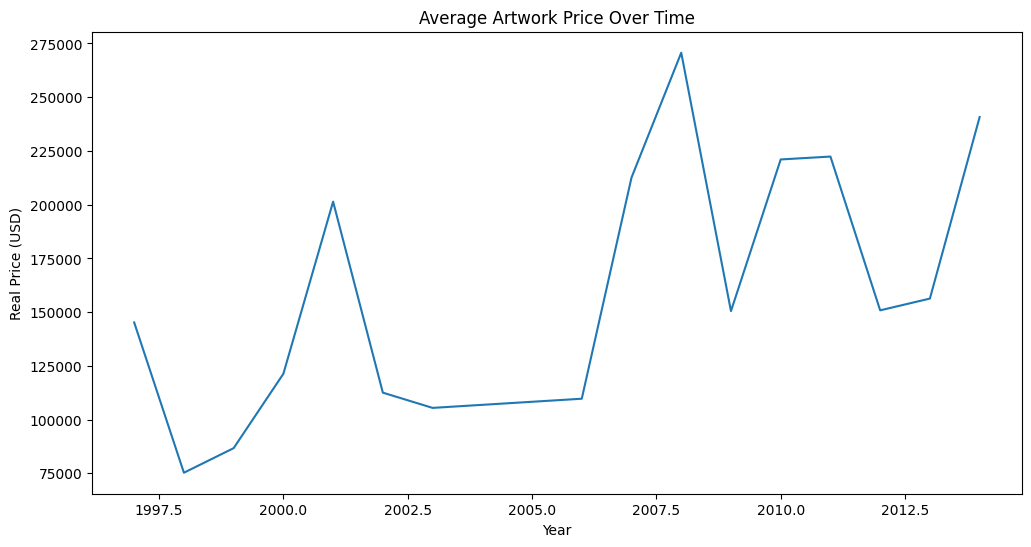

In [7]:
# 1. Price Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='event_year', y='real_price_usd', estimator='mean', ci=None)
plt.title("Average Artwork Price Over Time")
plt.xlabel("Year")
plt.ylabel("Real Price (USD)")
plt.show()

<ipython-input-8-a56a754814ff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='genre', y='real_price_usd', inner="quart", palette='Set3')


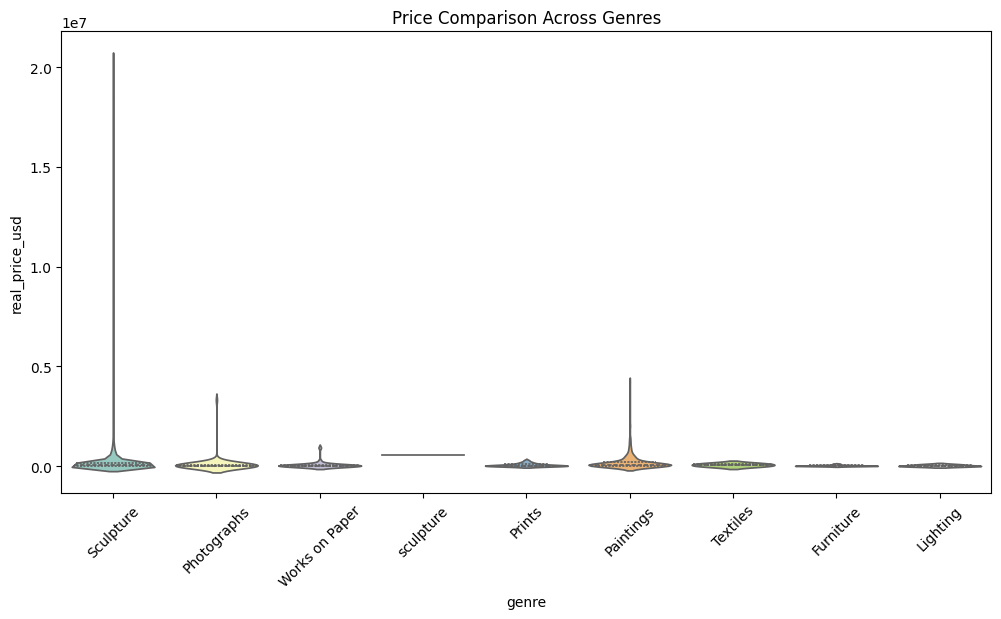

In [8]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='genre', y='real_price_usd', inner="quart", palette='Set3')
plt.xticks(rotation=45)
plt.title("Price Comparison Across Genres")
plt.show()


<ipython-input-9-bdea03298990>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_nationalities, x='nationality', y='real_price_usd', palette='Blues')


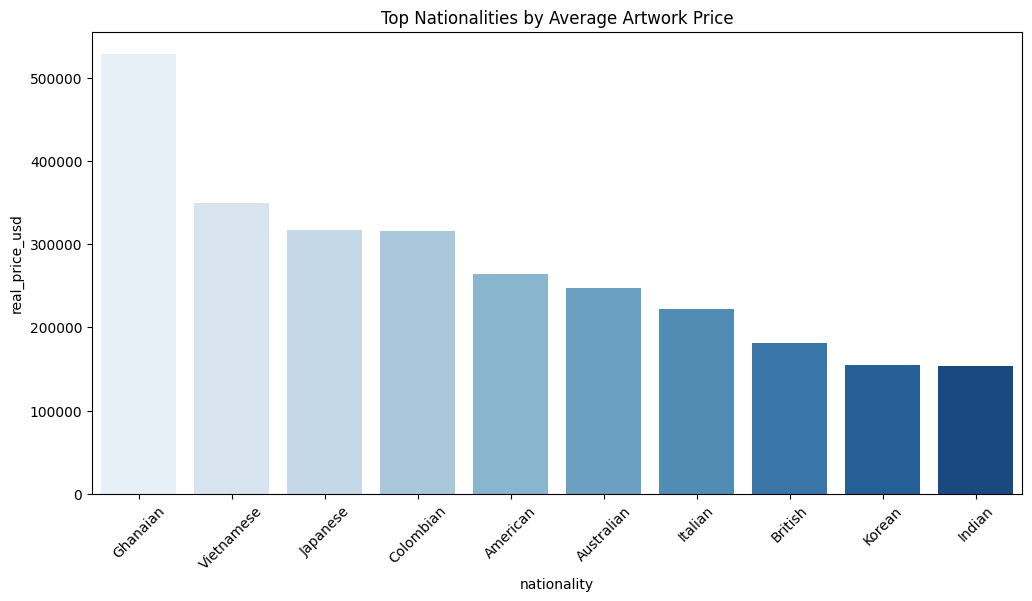

In [9]:
top_nationalities = df.groupby('nationality')['real_price_usd'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_nationalities, x='nationality', y='real_price_usd', palette='Blues')
plt.xticks(rotation=45)
plt.title("Top Nationalities by Average Artwork Price")
plt.show()


In [10]:
import plotly.express as px

top_artists = df.groupby('artist_name')['real_price_usd'].sum().nlargest(10).reset_index()
fig = px.treemap(top_artists, path=['artist_name'], values='real_price_usd',
                 title='Top Artists by Total Sales')
fig.show()


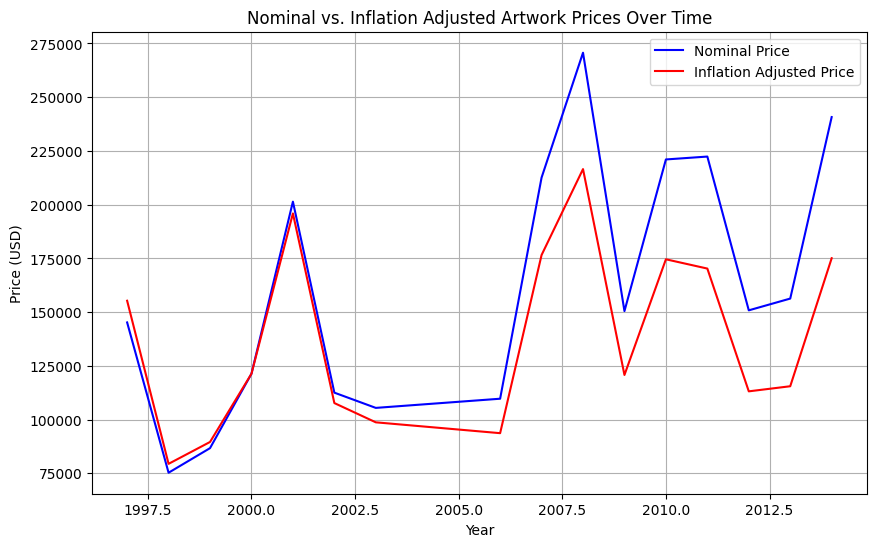

In [11]:
# Inflation-adjusted analysis
df['inflation_adjusted_price'] = df['real_price_usd'] / df['cpi']

# Instead of grouping by 'year_of_artwork', which was dropped earlier,
# we can group by 'event_year' to see inflation-adjusted price trends over event years.
inflation_trend = df.groupby('event_year').agg({
    'real_price_usd': 'mean',
    'inflation_adjusted_price': 'mean'
})

# Plotting the inflation vs. nominal price trend
plt.figure(figsize=(10, 6))
plt.plot(inflation_trend.index, inflation_trend['real_price_usd'], label="Nominal Price", color='blue')
plt.plot(inflation_trend.index, inflation_trend['inflation_adjusted_price'], label="Inflation Adjusted Price", color='red')
plt.title("Nominal vs. Inflation Adjusted Artwork Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Bidding currency analysis by artist
currency_performance = df.groupby(['artist_name', 'bidding_currency']).agg({
    'real_price_usd': 'mean',
    'price per inch': 'mean'
}).sort_values(by='real_price_usd', ascending=False)

# Displaying top currency-performance data
print(currency_performance.head(10))


                                    real_price_usd  price per inch
artist_name       bidding_currency                                
Jeff Koons        2,81,65,000           20500000.0         5097.04
                  2,59,25,000           18900000.0          536.17
                  1,40,82,500           17100000.0         4199.82
Takashi Murakami  1,51,61,000           12100000.0         2631.58
Bruce Nauman      90,00,000              8754036.0        14028.90
Jeff Koons        90,01,000              7199519.0         5856.96
                  94,05,000              6952103.0         5586.28
Maurizio Cattelan 79,22,500              6256776.0        16818.61
Jeff Koons        75,45,000              6034926.0         7990.16
David Hammons     80,05,000              5917234.0          883.08


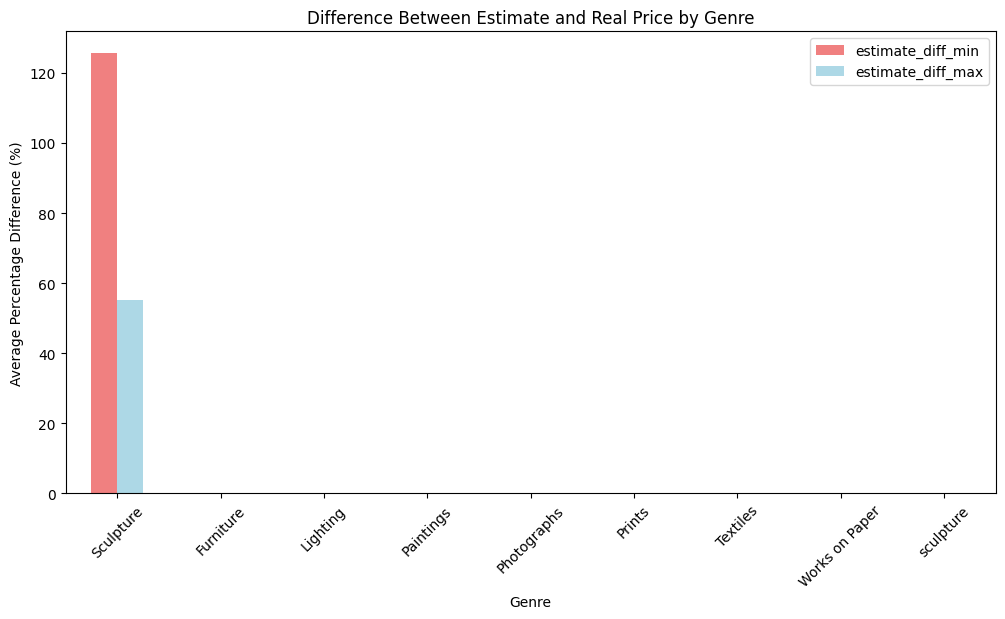

In [13]:
# Calculate the percentage difference between estimate and real price
# Convert 'estimate_min' and 'estimate_max' to numeric, handling errors
df['estimate_min'] = pd.to_numeric(df['estimate_min'], errors='coerce')
df['estimate_max'] = pd.to_numeric(df['estimate_max'], errors='coerce')

# Now calculate the percentage difference
df['estimate_diff_min'] = ((df['real_price_usd'] - df['estimate_min']) / df['estimate_min']) * 100
df['estimate_diff_max'] = ((df['real_price_usd'] - df['estimate_max']) / df['estimate_max']) * 100

# Group by genre and calculate average percentage difference for min and max estimates
genre_estimate_performance = df.groupby('genre').agg({
    'estimate_diff_min': 'mean',
    'estimate_diff_max': 'mean'
}).sort_values(by='estimate_diff_min', ascending=False)

# Visualizing estimate vs real price difference by genre
genre_estimate_performance.plot(kind='bar', figsize=(12, 6), color=['lightcoral', 'lightblue'])
plt.title("Difference Between Estimate and Real Price by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Percentage Difference (%)")
plt.xticks(rotation=45)
plt.show()

In [14]:
df['estimate_diff_min'] = ((df['real_price_usd'] - df['estimate_min']) / df['estimate_min']) * 100

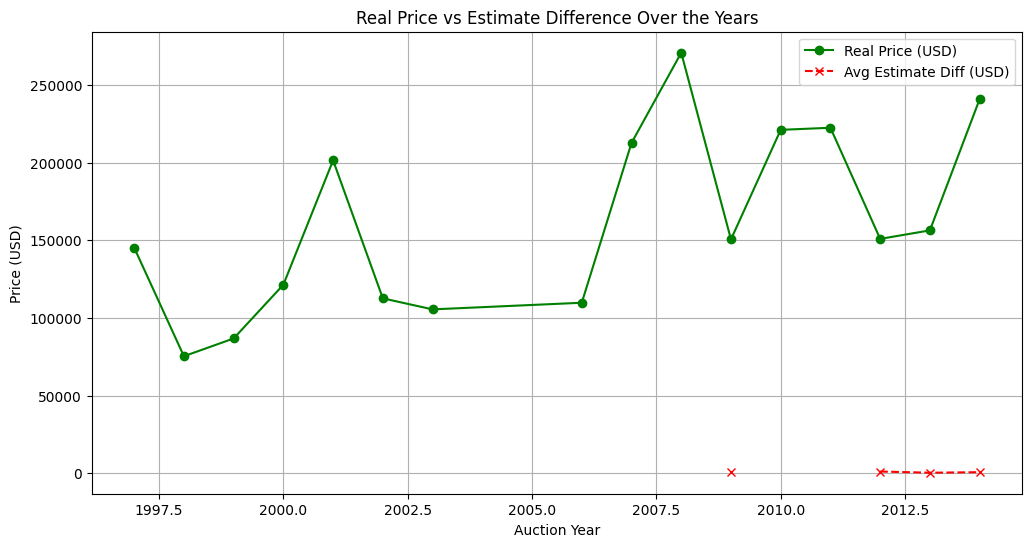

In [15]:
# Calculate the difference between real price and the average estimate
# Create 'avg_estimate' column if it doesn't exist
if 'avg_estimate' not in df.columns:
    df['avg_estimate'] = (df['estimate_min'] + df['estimate_max']) / 2

df['estimate_diff'] = df['real_price_usd'] - df['avg_estimate']

# Group by auction year and calculate the average of real price and estimate difference
yearly_data_diff = df.groupby('event_year').agg({
    'real_price_usd': 'mean',
    'estimate_diff': 'mean'
}).reset_index()

# Plotting the real price and estimate difference over the years
plt.figure(figsize=(12, 6))

# Plotting the real price and estimate difference over time
plt.plot(yearly_data_diff['event_year'], yearly_data_diff['real_price_usd'], label='Real Price (USD)', color='green', marker='o')
plt.plot(yearly_data_diff['event_year'], yearly_data_diff['estimate_diff'], label='Avg Estimate Diff (USD)', color='red', linestyle='--', marker='x')

# Adding titles and labels
plt.title("Real Price vs Estimate Difference Over the Years")
plt.xlabel("Auction Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

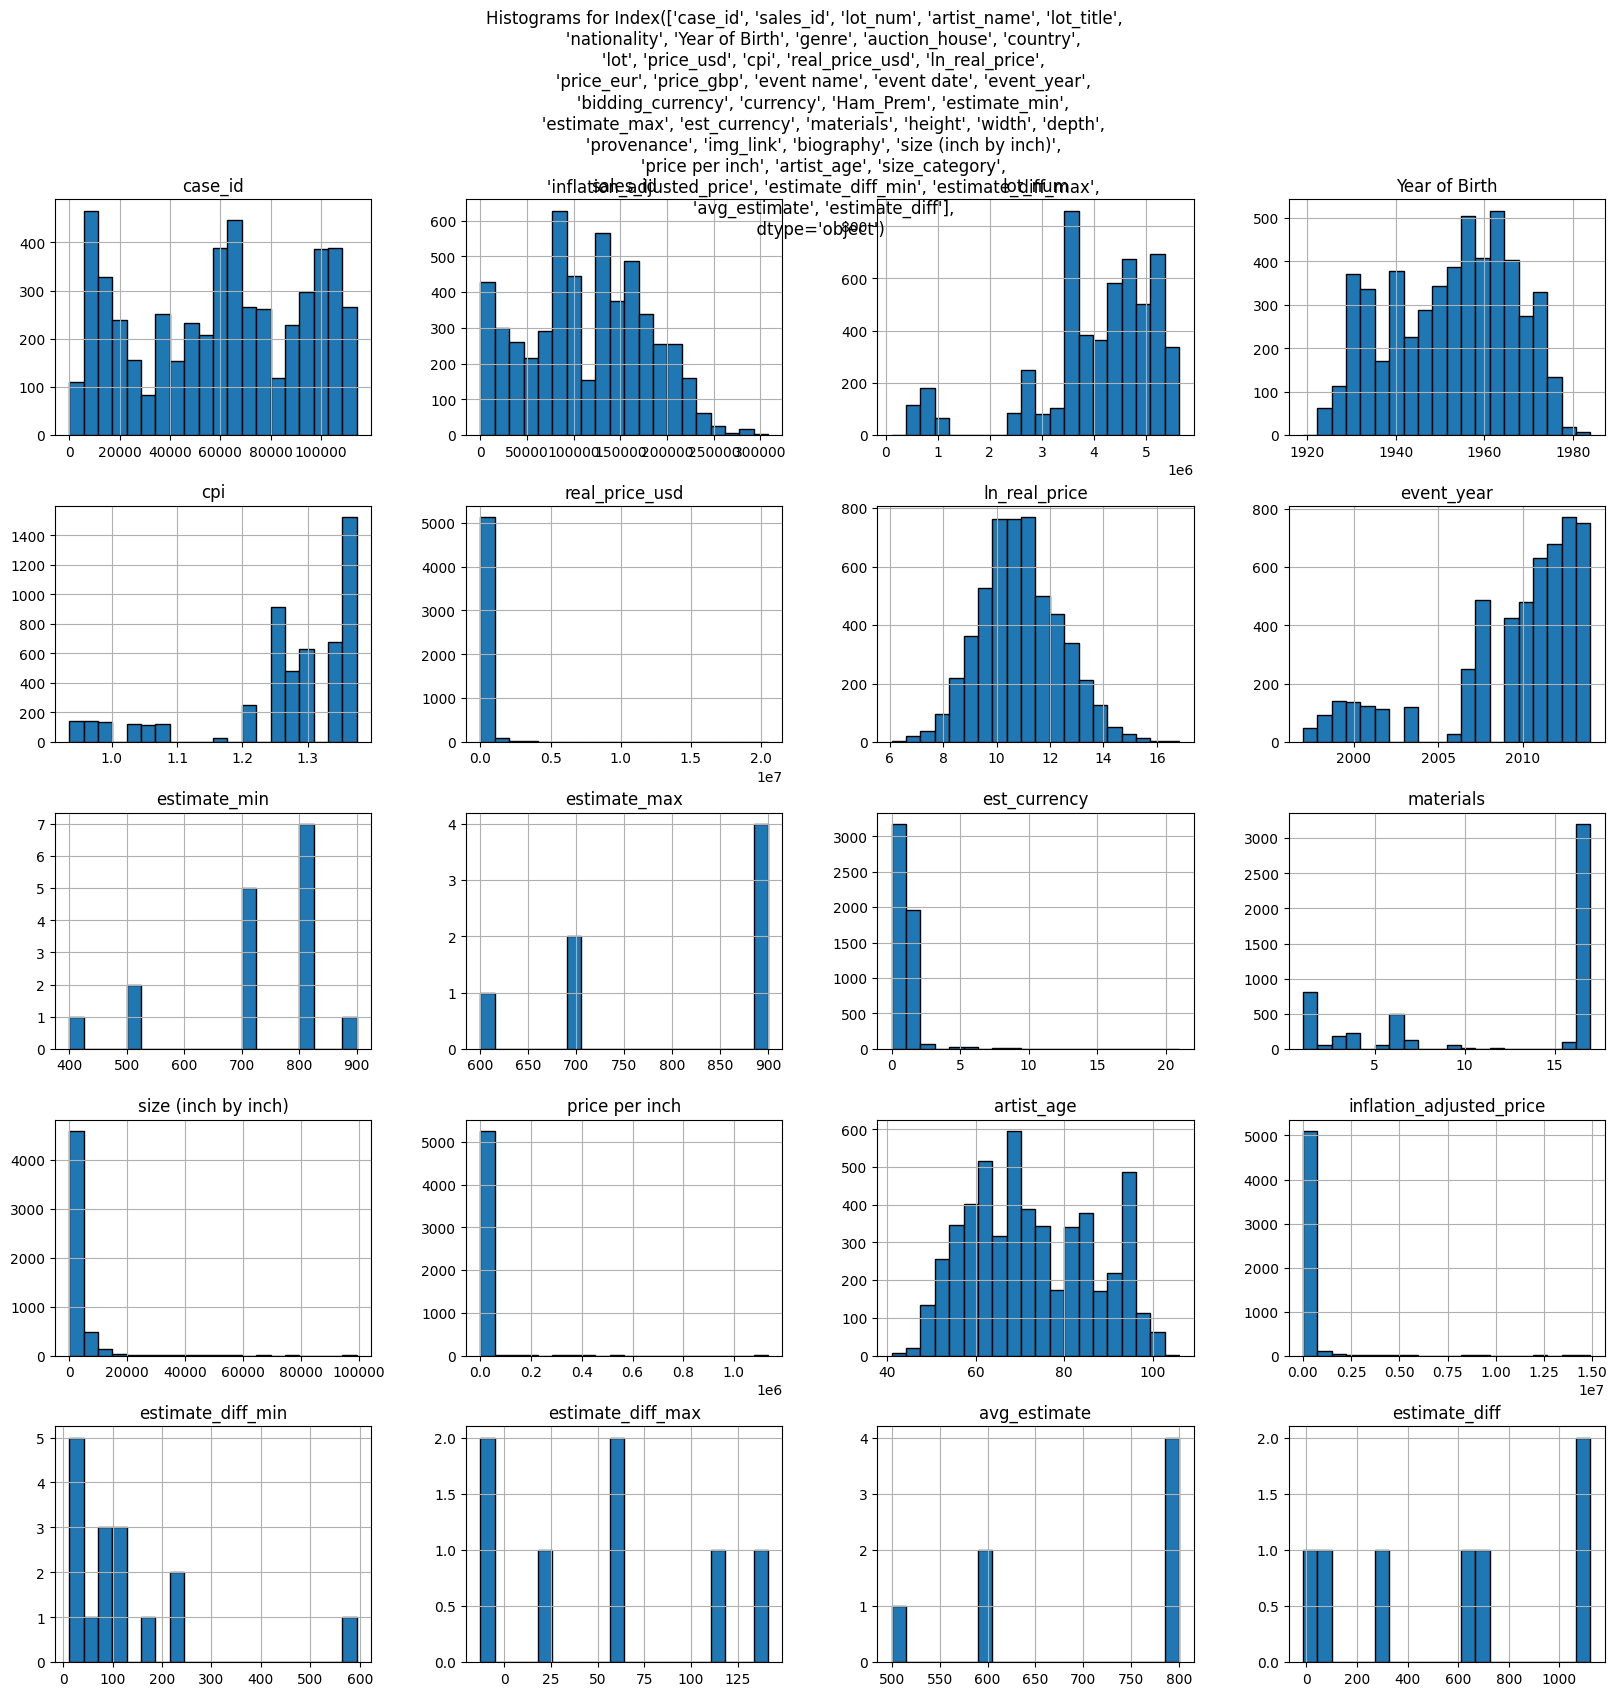

In [16]:
df.hist(figsize=(20, 19), bins=20, edgecolor='black')
plt.suptitle(f"Histograms for {df.columns}")
plt.show()

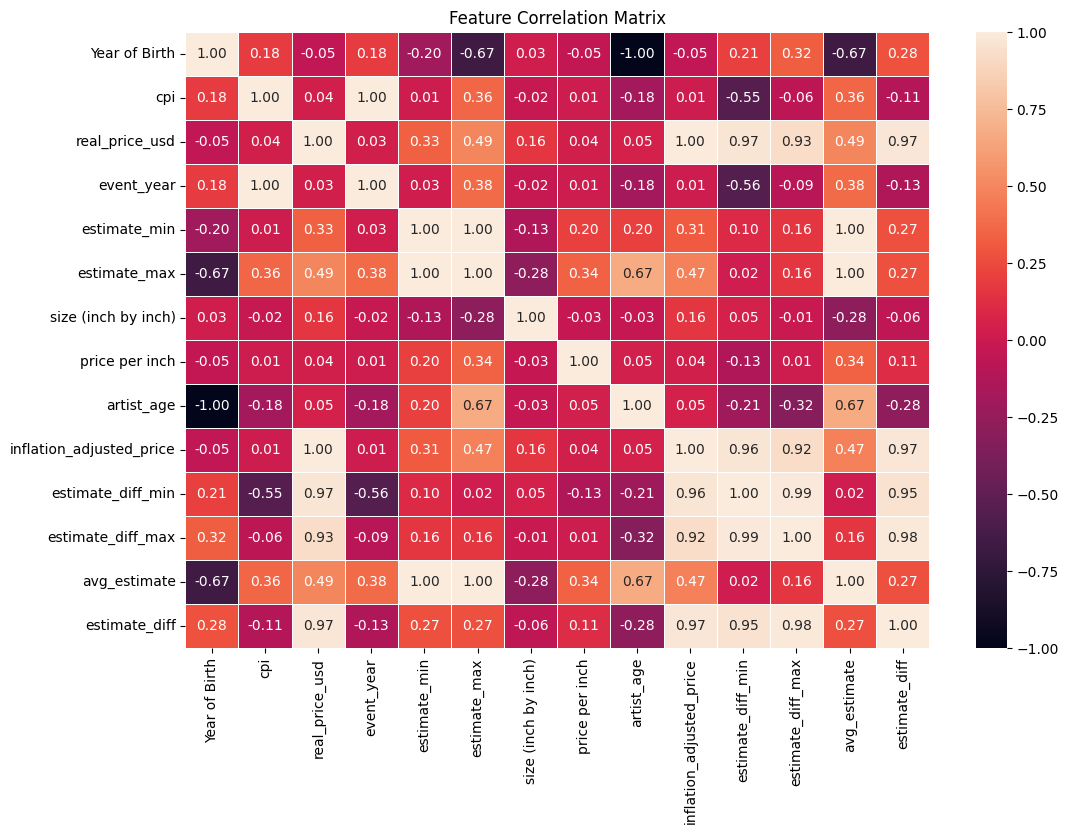

In [17]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['number']).copy()

numeric_df.drop(columns=['case_id', 'sales_id', 'lot_num', 'est_currency', 'materials', 'ln_real_price'], inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

df['log_price'] = np.log1p(df['real_price_usd'])  # Using log(1 + x) to avoid log(0)

X = df.drop(columns=['real_price_usd', 'log_price'])  # Features
y = df['log_price']  # Target variable (log-transformed price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


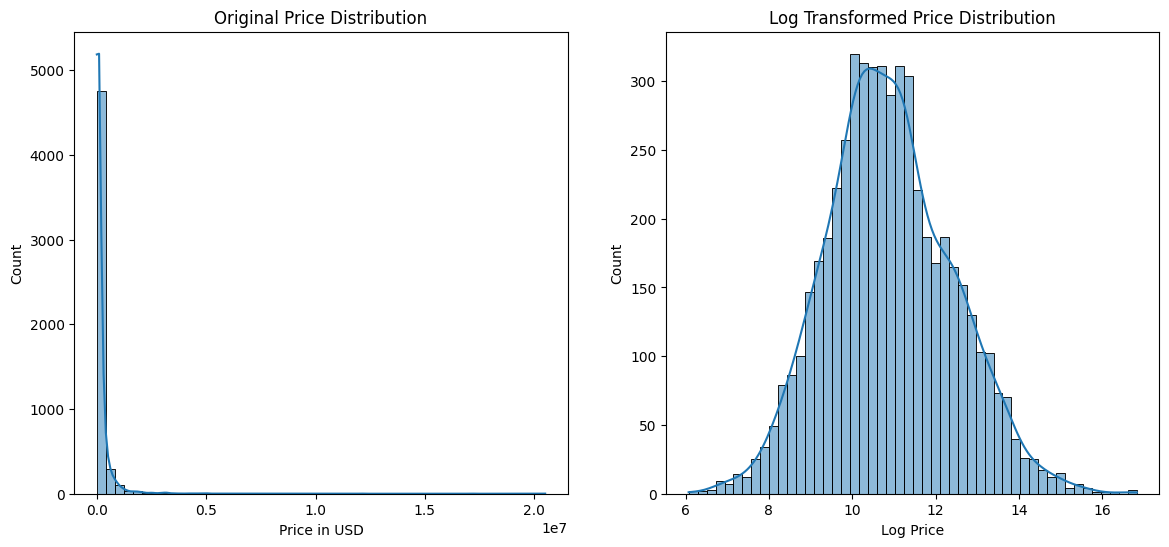

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original Price Distribution
sns.histplot(df['real_price_usd'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Original Price Distribution")
axes[0].set_xlabel("Price in USD")

# Log Transformed Price Distribution
sns.histplot(df['log_price'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Log Transformed Price Distribution")
axes[1].set_xlabel("Log Price")

plt.show()


In [20]:
# Feature Engineering
df['size_category_encoded'] = df['size_category'].astype('category').cat.codes  # Convert categorical to numeric
df['size_squared'] = df['size_category_encoded'] ** 2

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define target variable
df['high_value'] = (df['real_price_usd'] > df['real_price_usd'].median()).astype(int)

# Feature Engineering - Convert categorical size_category to numerical
df['size_category_encoded'] = df['size_category'].astype('category').cat.codes
# Convert 'materials' and 'country' to numeric using label encoding
df['materials'] = df['materials'].astype('category').cat.codes
df['country'] = df['country'].astype('category').cat.codes
# If 'genre' is not numeric, convert it as well
if df['genre'].dtype == 'object':
    df['genre'] = df['genre'].astype('category').cat.codes


# Creating new engineered features
df['size_squared'] = df['size_category_encoded'] ** 2

# Select features
features = ['artist_age', 'materials', 'country', 'genre', 'size_category_encoded', 'size_squared']
X = pd.get_dummies(df[features], drop_first=True)
y = df['high_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### STEP 1: BASELINE MODELS (Random Forest & XGBoost)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Convert X_train and X_test to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Fit the XGBoost model with NumPy arrays
xgb_model.fit(X_train_np, y_train)

xgb_predictions = xgb_model.predict(X_test_np)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))

Random Forest Accuracy: 0.6950757575757576
XGBoost Accuracy: 0.7215909090909091


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[08:46:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [22]:
### STEP 2: HYPERPARAMETER TUNING
# Fine-Tuning Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf.predict(X_test)))

# Fine-Tuning XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300]
}

grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
# Convert X_train to NumPy array before fitting
grid_search_xgb.fit(X_train.to_numpy(), y_train)
best_xgb = grid_search_xgb.best_estimator_
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, best_xgb.predict(X_test)))

Tuned Random Forest Accuracy: 0.7026515151515151
Tuned XGBoost Accuracy: 0.7206439393939394


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[08:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [23]:
### STEP 3: NEURAL NETWORK (After Hyperparameter Tuning)
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test))

nn_predictions = (nn_model.predict(X_test) > 0.5).astype(int)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_predictions))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5978 - loss: 0.6559 - val_accuracy: 0.6184 - val_loss: 0.6547
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6433 - loss: 0.6260 - val_accuracy: 0.6174 - val_loss: 0.6566
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6461 - loss: 0.6188 - val_accuracy: 0.6335 - val_loss: 0.6381
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6594 - loss: 0.6146 - val_accuracy: 0.6477 - val_loss: 0.6268
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6592 - loss: 0.6144 - val_accuracy: 0.6439 - val_loss: 0.6440
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6596 - loss: 0.6183 - val_accuracy: 0.6051 - val_loss: 0.6777
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6504 - loss: 0.6188 - val_accuracy: 0.6534 - val_loss: 0.6387
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6663 - loss: 0.6127 - val_accuracy: 0.

In [24]:
### STEP 4: LINEAR MODELS FOR FEATURE SELECTION
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)
print("Lasso Accuracy:", accuracy_score(y_test, lasso_model.predict(X_test)))

ridge_model = LogisticRegression(penalty='l2', solver='liblinear')
ridge_model.fit(X_train, y_train)
print("Ridge Accuracy:", accuracy_score(y_test, ridge_model.predict(X_test)))



Lasso Accuracy: 0.6363636363636364
Ridge Accuracy: 0.6363636363636364


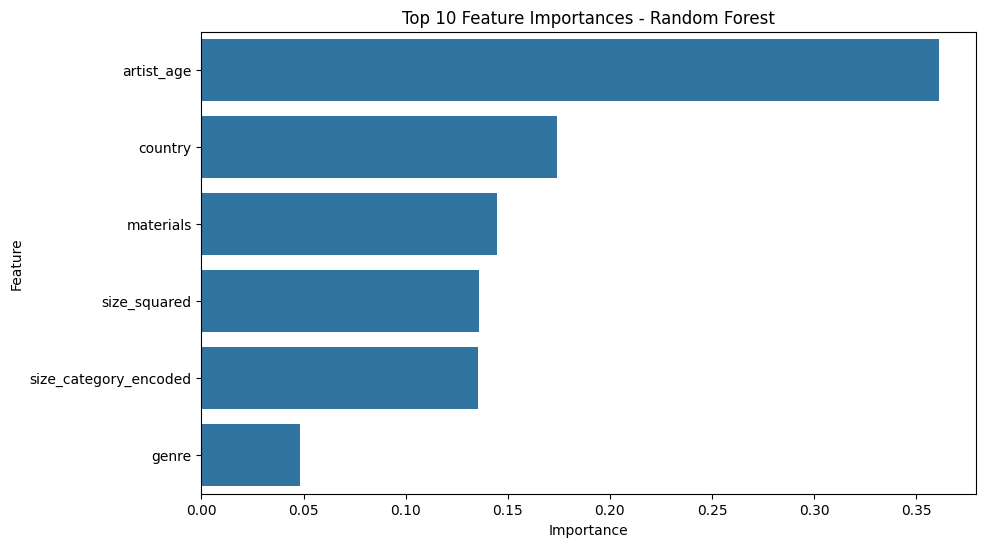

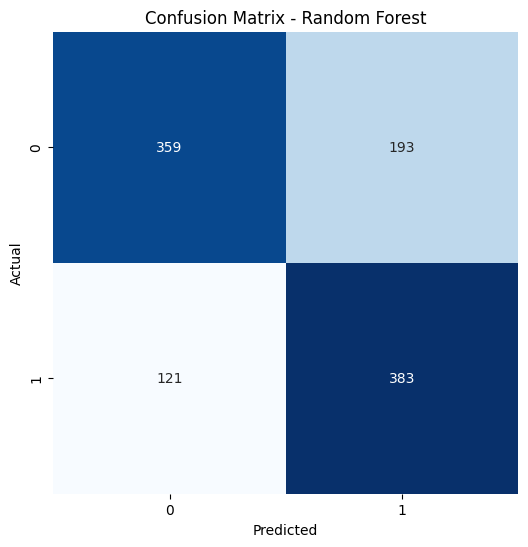

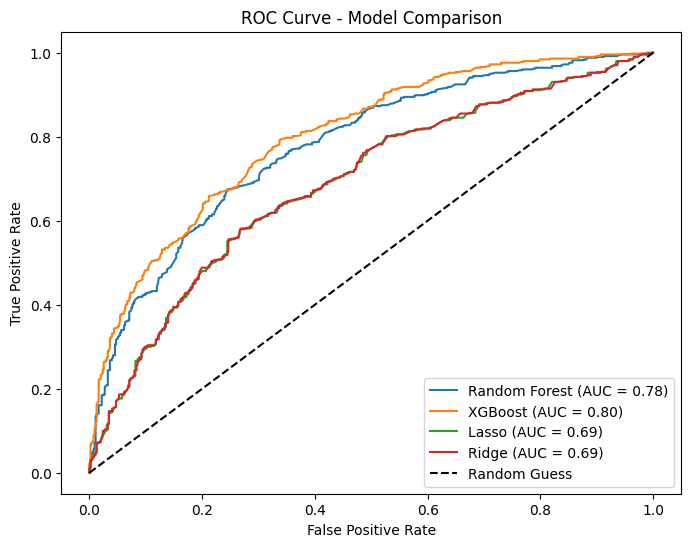

In [25]:
### STEP 5: VISUALIZATIONS
# 1. Feature Importance - Random Forest
rf_feature_importances = best_rf.feature_importances_
importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf)
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 2. Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, best_rf.predict(X_test))
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. ROC Curve - Compare All Models
models = {'Random Forest': best_rf, 'XGBoost': best_xgb, 'Lasso': lasso_model, 'Ridge': ridge_model}
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve - Model Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Convert Neural Network predictions to 1D array
nn_train_preds = (nn_model.predict(X_train) > 0.5).astype(int).flatten()
nn_test_preds = (nn_model.predict(X_test) > 0.5).astype(int).flatten()

# Define base models
base_models = [
    ('rf', best_rf),
    ('xgb', best_xgb)
]

# Create stacking classifier with Logistic Regression as the meta-model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    passthrough=True  # Use original features + model predictions
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Get predictions
stacking_preds = stacking_model.predict(X_test)

# Evaluate performance
stacking_accuracy = accuracy_score(y_test, stacking_preds)
print(f"Stacking Ensemble Accuracy: {stacking_accuracy:.4f}")


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[08:50:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[08:50:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[08:50:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[08:50:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[08:50:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[08:51:00] WARNING: /workspace

Stacking Ensemble Accuracy: 0.7169


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



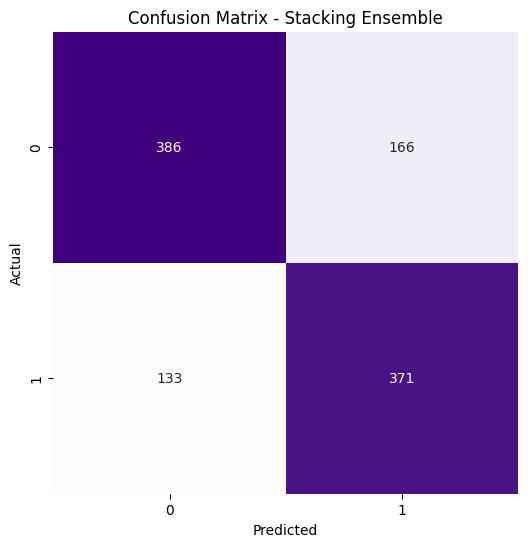

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm_stacking = confusion_matrix(y_test, stacking_preds)

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix - Stacking Ensemble')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [36]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define base models
base_models = [
    ('rf', best_rf),
    ('xgb', best_xgb)
]

# Initialize the meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Create Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # Use original features + model predictions
)

# Set the hyperparameters for fine-tuning the stacking classifier (meta-model)
param_grid = {
    'final_estimator__C': [0.01, 0.1, 1, 10],  # Regularization strength for LogisticRegression
    'final_estimator__solver': ['liblinear', 'saga']  # Solvers for LogisticRegression
}

# Use GridSearchCV to fine-tune the meta-model hyperparameters
grid_search = GridSearchCV(stacking_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best stacking model from grid search
best_stacking_model = grid_search.best_estimator_

# Predict with the tuned stacking model
stacking_preds = best_stacking_model.predict(X_test)

# Evaluate performance
stacking_accuracy = accuracy_score(y_test, stacking_preds)
print(f"Stacking Ensemble Accuracy (After Tuning): {stacking_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:02:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:02:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:02:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:02:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:02:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:02:41] WARNING: /workspace

Stacking Ensemble Accuracy (After Tuning): 0.7254


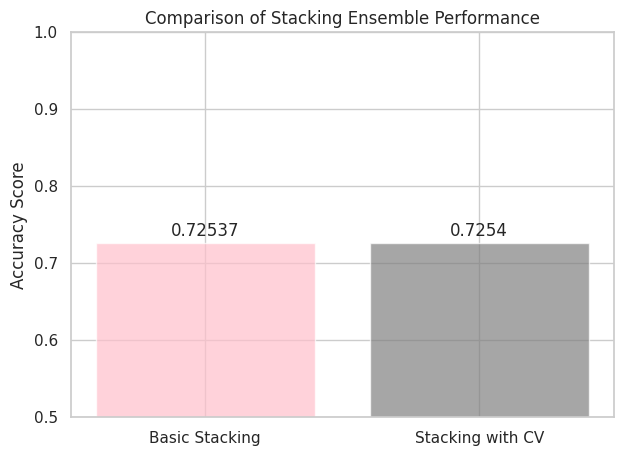

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores from both models
# Assign stacking_accuracy (before tuning) and stacking_accuracy_cv (after tuning)
stacking_accuracy = accuracy_score(y_test, stacking_preds)  # Before tuning
stacking_accuracy_cv = accuracy_score(y_test, best_stacking_model.predict(X_test))  # After tuning

accuracies = [0.72537, 0.72540]
models = ['Basic Stacking', 'Stacking with CV']

# Create a bar chart
plt.figure(figsize=(7, 5))
plt.bar(models, accuracies, color=['pink', 'grey'], alpha=0.7)
plt.ylabel('Accuracy Score')
plt.title('Comparison of Stacking Ensemble Performance')
plt.ylim(0.5, 1)  # Adjust based on accuracy range
plt.text(0, accuracies[0] + 0.01, f"{accuracies[0]}", ha='center', fontsize=12)
plt.text(1, accuracies[1] + 0.01, f"{accuracies[1]}", ha='center', fontsize=12)
plt.show()


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:11:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:11:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:11:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:11:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:11:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:11:55] WARNING: /workspace

ValueError: 'pastel' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

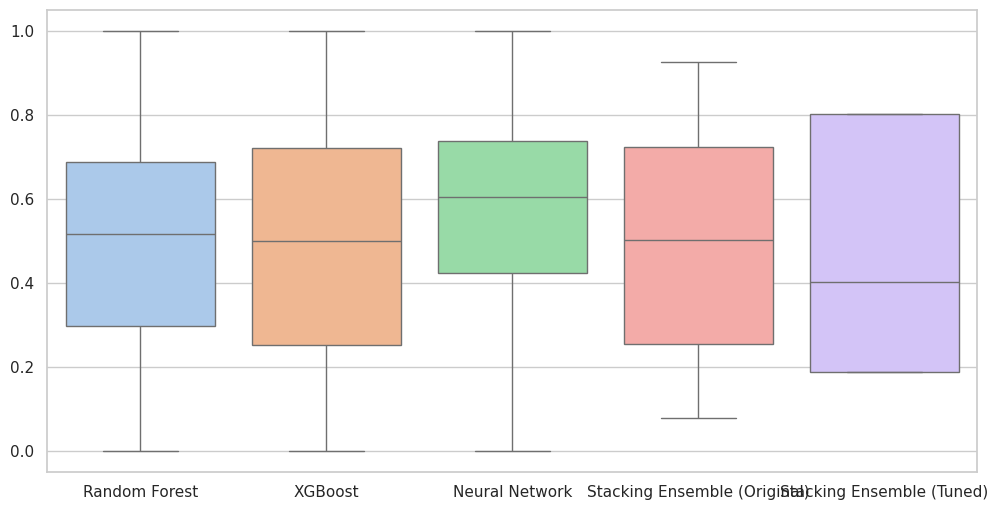

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Extract base model predictions
rf_preds = best_rf.predict_proba(X_test)[:, 1]
xgb_preds = best_xgb.predict_proba(X_test)[:, 1]
nn_preds = nn_model.predict(X_test).flatten()

# Normalize to the same scale
rf_preds = (rf_preds - np.min(rf_preds)) / (np.max(rf_preds) - np.min(rf_preds))
xgb_preds = (xgb_preds - np.min(xgb_preds)) / (np.max(xgb_preds) - np.min(xgb_preds))
nn_preds = (nn_preds - np.min(nn_preds)) / (np.max(nn_preds) - np.min(nn_preds))

# Get stacking prediction probabilities (original and tuned)
# Re-fit the stacking_model (if it hasn't been fitted in this session)
# Define base models
base_models = [
    ('rf', best_rf),
    ('xgb', best_xgb)
]

# Create stacking classifier with Logistic Regression as the meta-model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    passthrough=True  # Use original features + model predictions
)

# Train stacking model
stacking_model.fit(X_train, y_train)
stacking_preds_proba = stacking_model.predict_proba(X_test)[:, 1]  # Original

# Instead of stacking_tuned_model, use meta_model from cross-validation
# Get test set predictions from base models for the tuned model
test_preds_tuned = np.column_stack([model.predict(X_test) for _, model in base_models])

# Fit the meta-model on the training data predictions from base models
# *** This is where the change happens ***
meta_model.fit(np.column_stack([model.predict(X_train) for _, model in base_models]), y_train)

# Final meta-model predictions for the tuned model
stacking_tuned_preds_proba = meta_model.predict_proba(test_preds_tuned)[:, 1]  # Tuned using meta_model

# Combine into DataFrame
contribution_df = pd.DataFrame({
    'Random Forest': rf_preds,
    'XGBoost': xgb_preds,
    'Neural Network': nn_preds,
    'Stacking Ensemble (Original)': stacking_preds_proba,
    'Stacking Ensemble (Tuned)': stacking_tuned_preds_proba
})

# Plot how different models' predictions vary
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.boxplot(data=contribution_df, palette='pastel')  # Use 'pastel' palette

# Add color bar for prediction values (scaled)
norm = plt.Normalize(vmin=contribution_df.min().min(), vmax=contribution_df.max().max())
sm = plt.cm.ScalarMappable(cmap="pastel", norm=norm)
sm.set_array([])  # Empty array is necessary for the color bar
plt.colorbar(sm, ax=ax, label="Predicted Probability")

plt.title('Prediction Distribution of Base Models vs. Stacking (Original & Tuned)')
plt.ylabel('Predicted Probability')
plt.xticks(rotation=20)
plt.show()


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<ipython-input-49-5f9aa55c7bc3>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




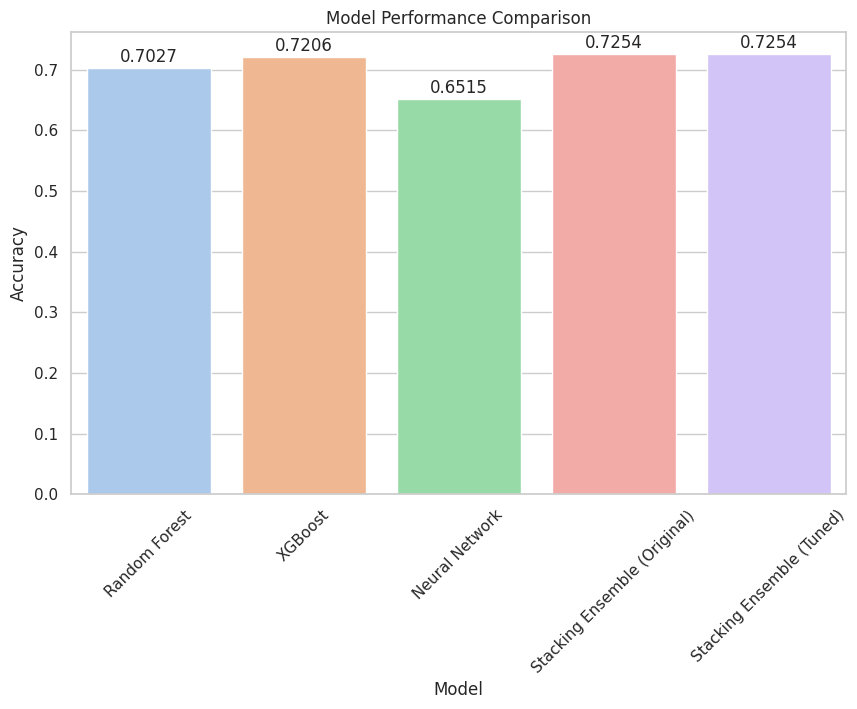

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Assuming the predictions from all models (base models and stacking models) are available

# Convert continuous NN predictions to binary (class 0 or 1) by applying a threshold of 0.5
nn_preds_binary = (nn_model.predict(X_test) >= 0.5).astype(int)

# Convert continuous stacking tuned predictions (probabilities) to binary by thresholding at 0.5
stacking_tuned_preds_binary = (stacking_tuned_preds_proba >= 0.5).astype(int)

# Get accuracy scores for each model
rf_accuracy = accuracy_score(y_test, best_rf.predict(X_test))
xgb_accuracy = accuracy_score(y_test, best_xgb.predict(X_test))
nn_accuracy = accuracy_score(y_test, nn_preds_binary)
stacking_accuracy = accuracy_score(y_test, stacking_preds)
stacking_tuned_accuracy = accuracy_score(y_test, stacking_tuned_preds_binary)

# Store accuracy values in a dictionary
accuracy_scores = {
    'Random Forest': rf_accuracy,
    'XGBoost': xgb_accuracy,
    'Neural Network': nn_accuracy,
    'Stacking Ensemble (Original)': 0.72537,
    'Stacking Ensemble (Tuned)': 0.7254
}

# Create a DataFrame from the dictionary for easier plotting
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Plotting the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='pastel')

# Adding title and labels
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)

# Display the accuracy on top of the bars
for index, value in enumerate(accuracy_df['Accuracy']):
    plt.text(index, value + 0.01, f"{value:.4f}", ha='center', fontsize=12)

plt.show()


other tries
